In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disease-prediction-using-machine-learning/Training.csv
/kaggle/input/disease-prediction-using-machine-learning/Testing.csv


In [2]:
df_train = pd.read_csv('/kaggle/input/disease-prediction-using-machine-learning/Training.csv')

In [3]:
df_test=pd.read_csv('/kaggle/input/disease-prediction-using-machine-learning/Testing.csv')

In [4]:
df_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [5]:
df_test.head(4)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis


In [6]:
df_train = df_train.drop('Unnamed: 133',axis=1)

In [7]:
df_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [8]:
df_train.shape

(4920, 133)

In [9]:
df_train.isnull().any()

itching                 False
skin_rash               False
nodal_skin_eruptions    False
continuous_sneezing     False
shivering               False
                        ...  
inflammatory_nails      False
blister                 False
red_sore_around_nose    False
yellow_crust_ooze       False
prognosis               False
Length: 133, dtype: bool

In [10]:
df_train.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [11]:
df_train.info

<bound method DataFrame.info of       itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0

In [12]:
df_train.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df_train.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [14]:
import numpy as np

In [15]:
import seaborn as sns

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
encoder=LabelEncoder()

In [18]:
x=df_train.drop('prognosis',axis=1)

In [19]:
x

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [20]:
y=df_train['prognosis']

In [21]:
y

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

In [22]:
X=df_test.drop('prognosis',axis=1)   #test.csv file

In [23]:
Y=df_test['prognosis']             #test.csvfile

In [24]:
np.max(x,axis=1)

0       1
1       1
2       1
3       1
4       1
       ..
4915    1
4916    1
4917    1
4918    1
4919    1
Length: 4920, dtype: int64

In [25]:
np.min(x,axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
4915    0
4916    0
4917    0
4918    0
4919    0
Length: 4920, dtype: int64

In [26]:
np.std(x,axis=0)

itching                 0.344695
skin_rash               0.366380
nodal_skin_eruptions    0.146524
continuous_sneezing     0.207572
shivering               0.146524
                          ...   
small_dents_in_nails    0.150446
inflammatory_nails      0.150446
blister                 0.150446
red_sore_around_nose    0.150446
yellow_crust_ooze       0.150446
Length: 132, dtype: float64

In [27]:
np.std(x,axis=1)

0       0.171420
1       0.149033
2       0.149033
3       0.149033
4       0.149033
          ...   
4915    0.208299
4916    0.171420
4917    0.171420
4918    0.208299
4919    0.190903
Length: 4920, dtype: float64

In [28]:
correlation_matrix = x.corr()
correlation_matrix

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
shivering,-0.059893,-0.065324,-0.022444,0.608981,1.000000,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
small_dents_in_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,1.000000,0.946120,-0.023720,-0.023720,-0.023720
inflammatory_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,0.946120,1.000000,-0.023720,-0.023720,-0.023720
blister,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,1.000000,0.946120,0.946120
red_sore_around_nose,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,1.000000,0.946120


In [29]:
prognosis_counts=df_train['prognosis'].value_counts()
prognosis_counts

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

In [30]:
label = prognosis_counts.index
value_count = prognosis_counts.values

In [31]:
import matplotlib.pyplot as plt

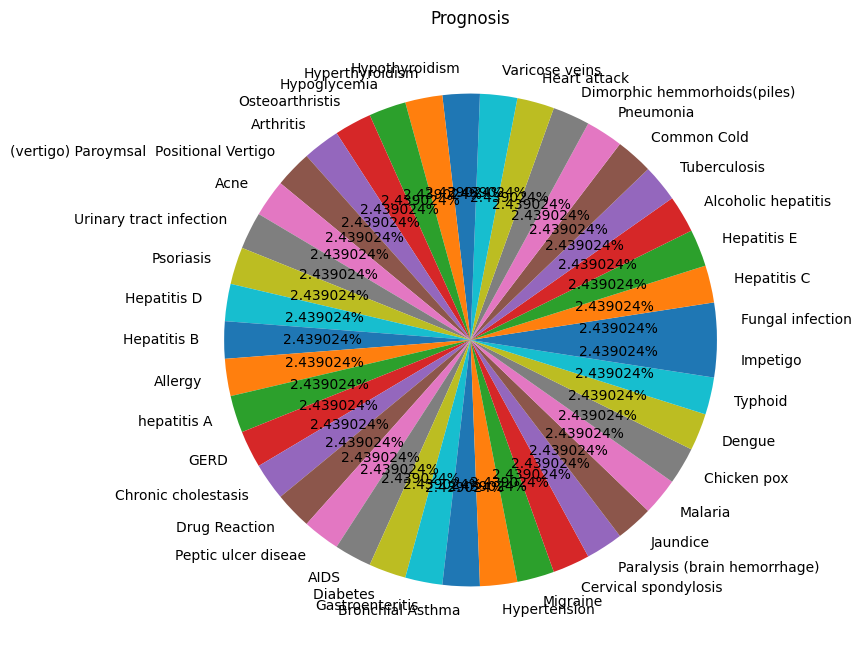

In [32]:
fig=plt.figure(figsize=(10,8))
plt.pie(value_count,labels=label,autopct='%1f%%')
plt.title('Prognosis')
plt.show()

<Axes: >

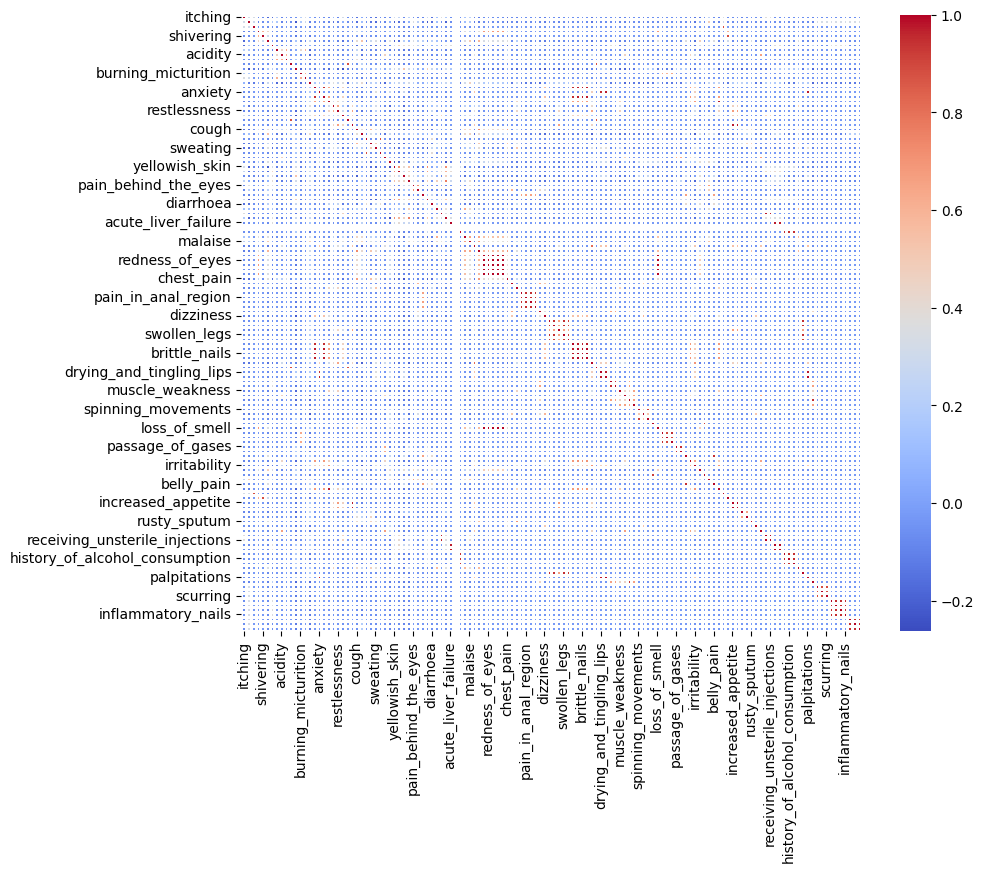

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(x.corr(),annot=False,linewidth=1 , cmap ='coolwarm')

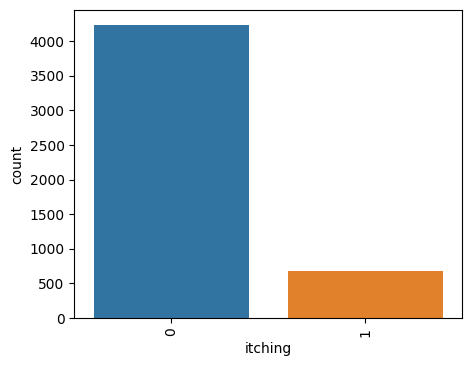

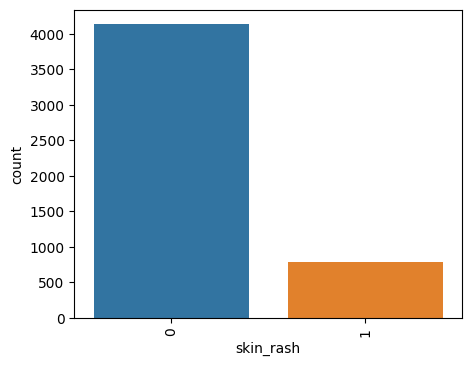

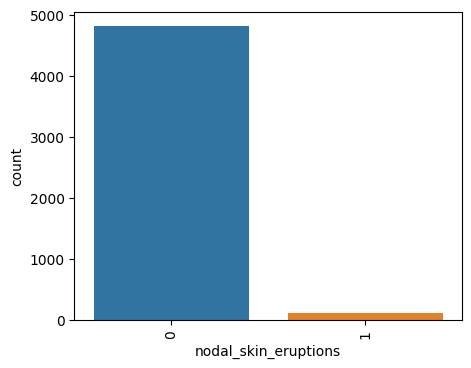

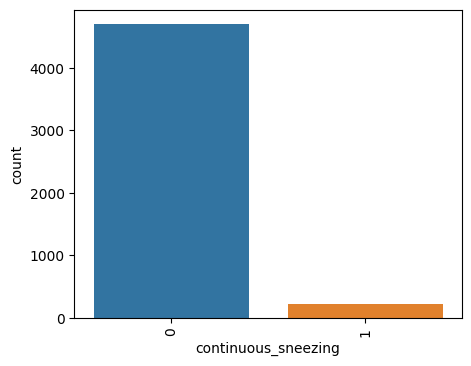

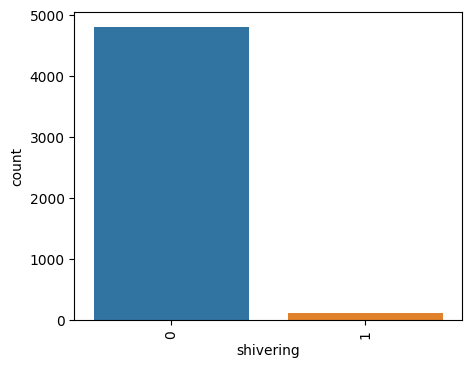

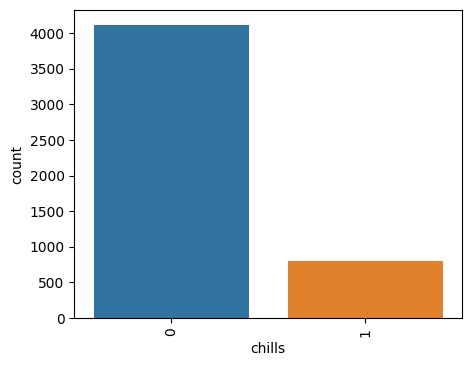

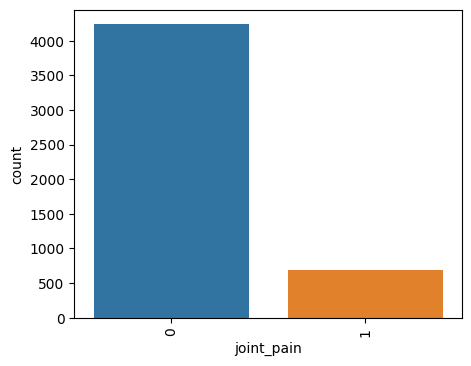

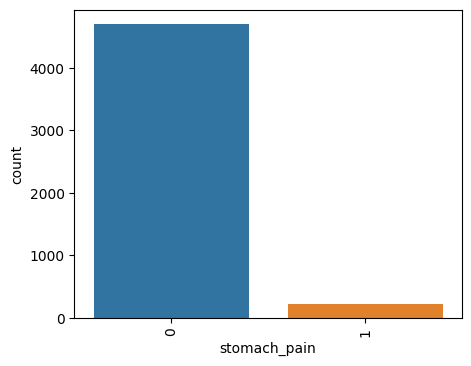

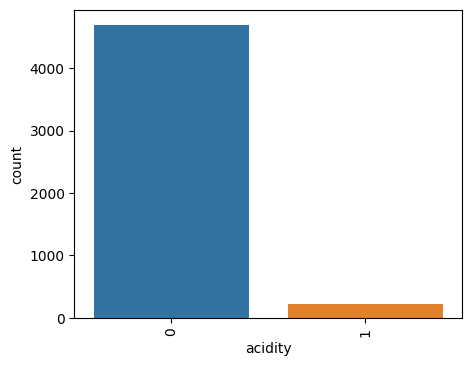

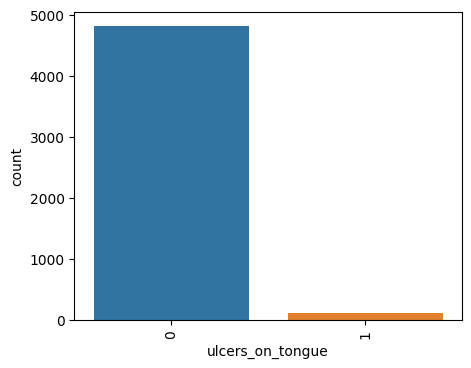

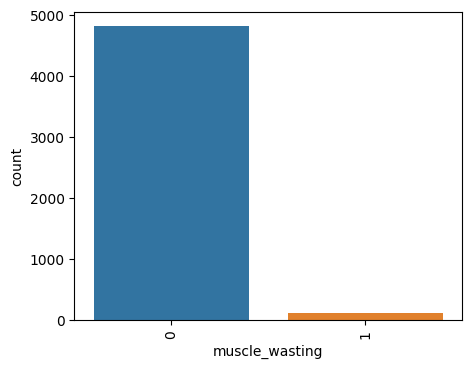

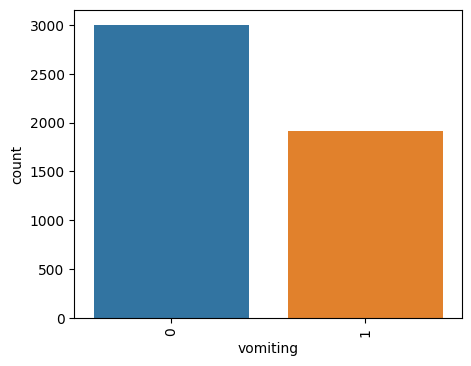

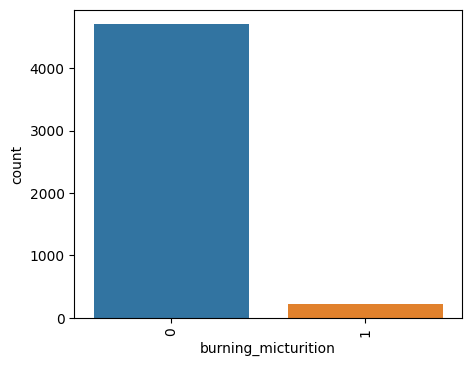

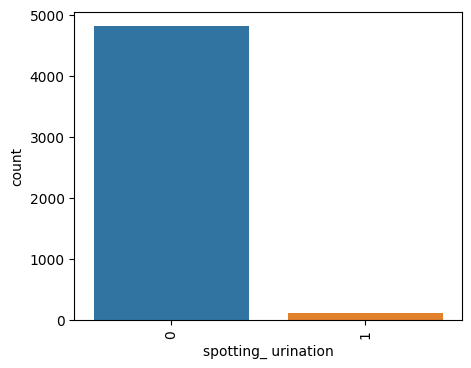

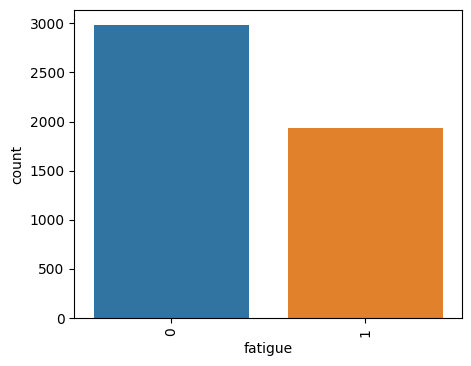

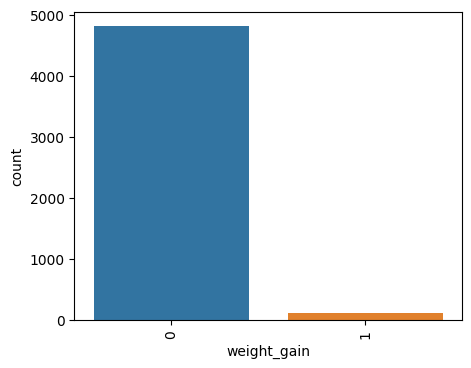

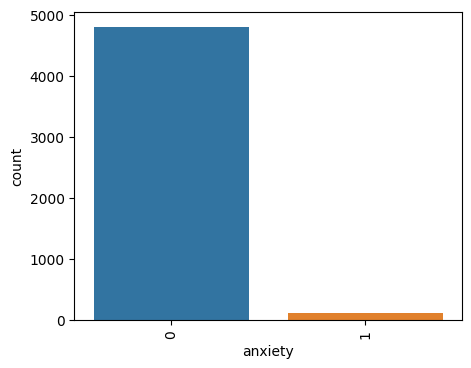

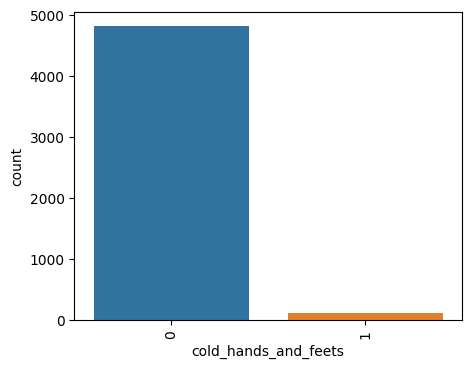

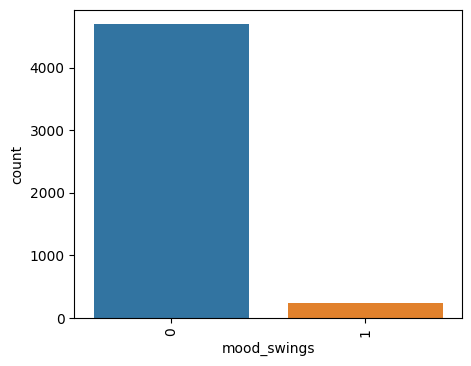

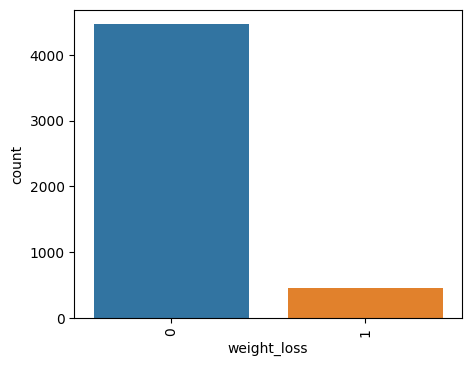

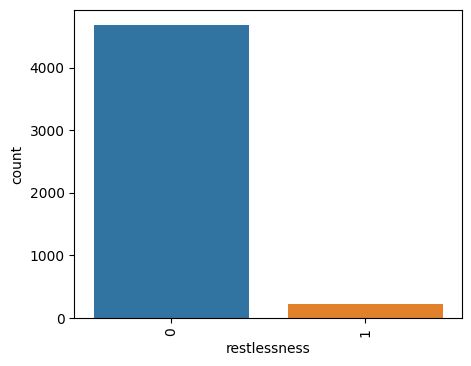

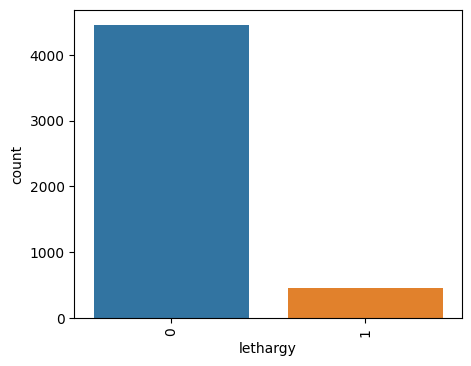

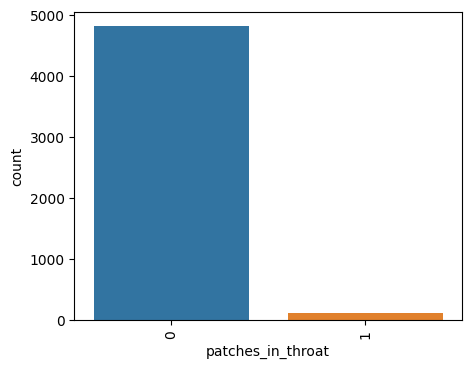

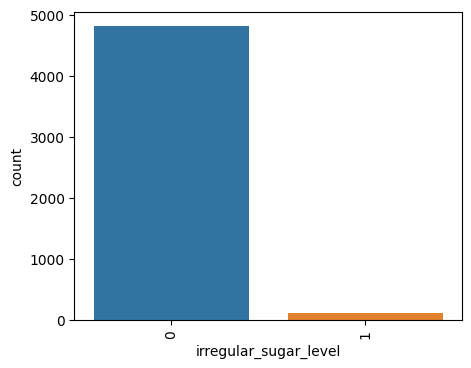

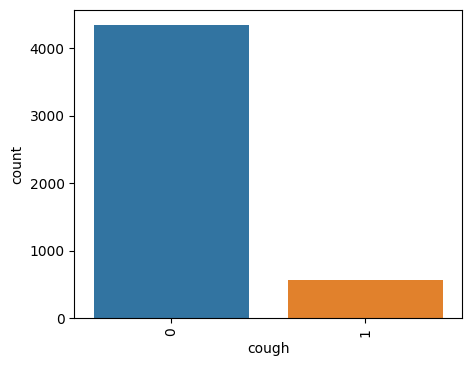

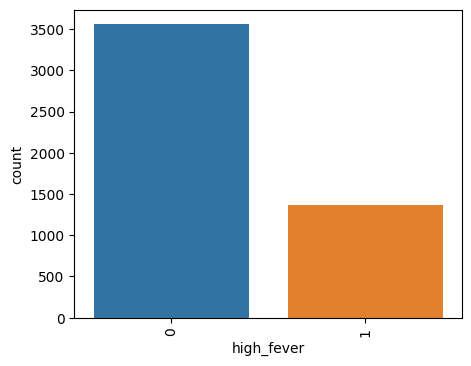

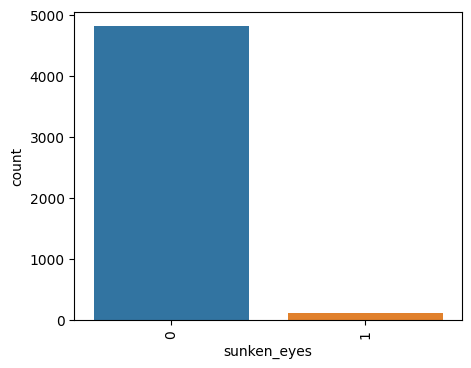

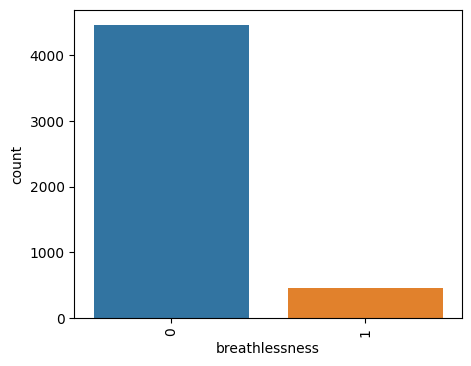

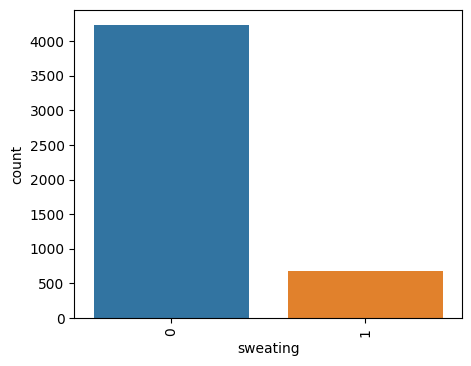

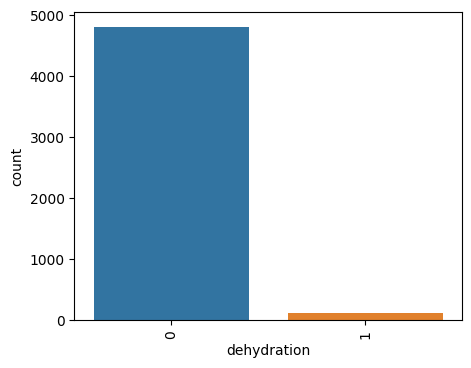

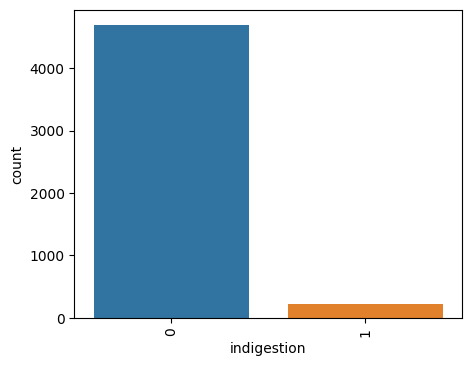

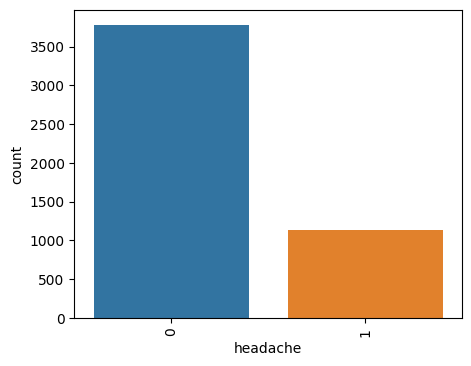

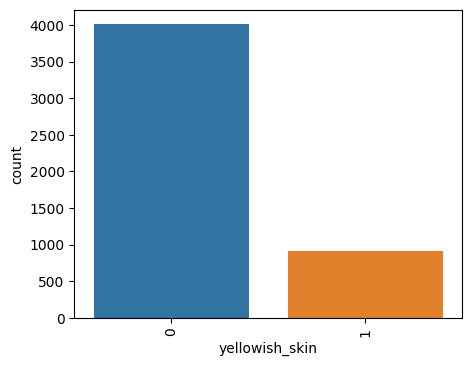

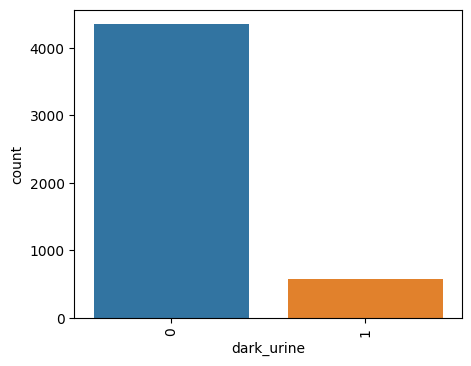

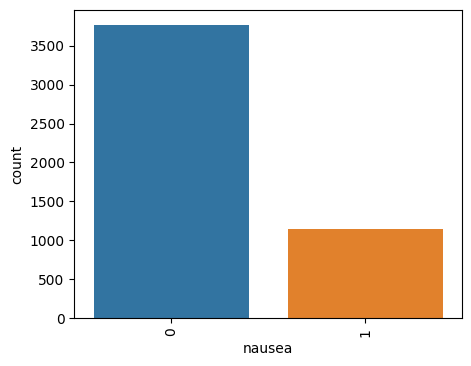

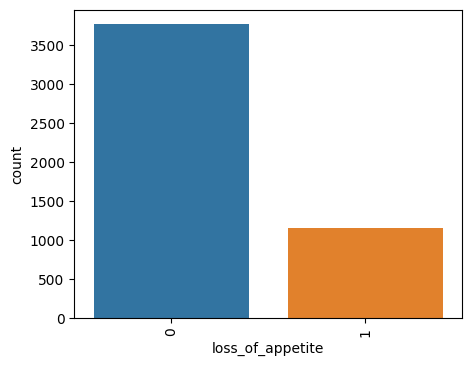

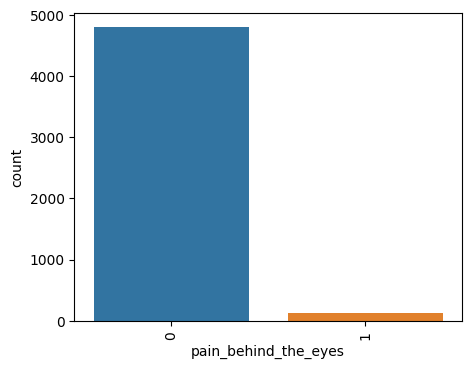

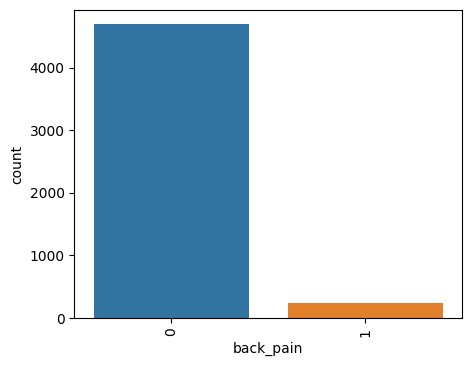

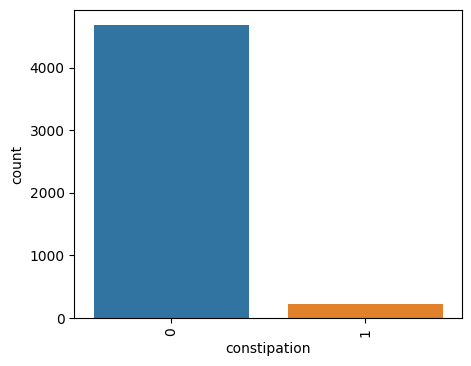

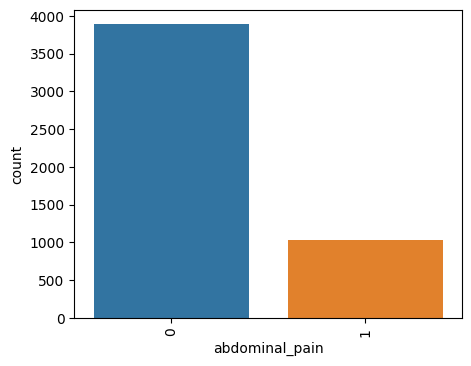

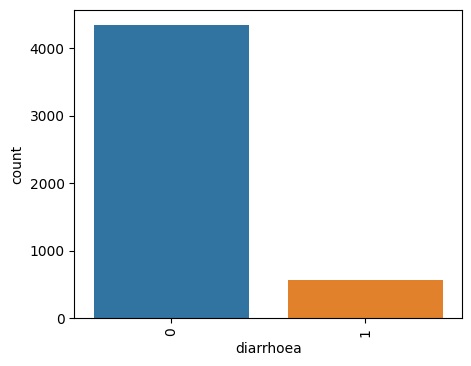

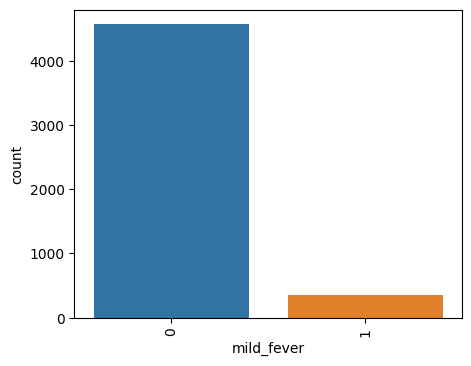

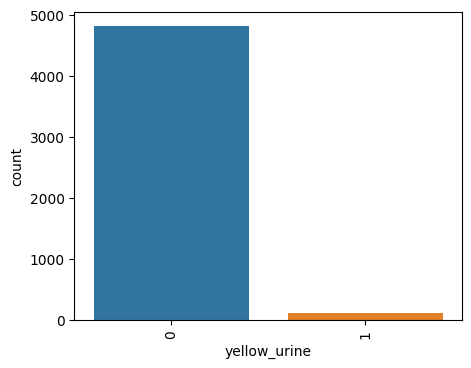

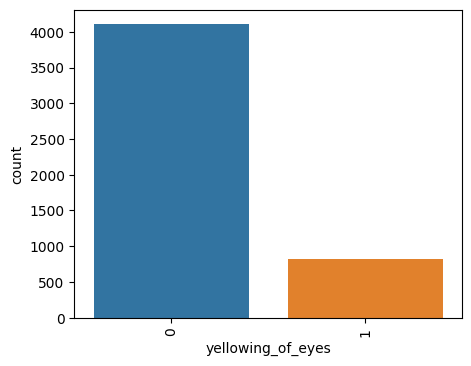

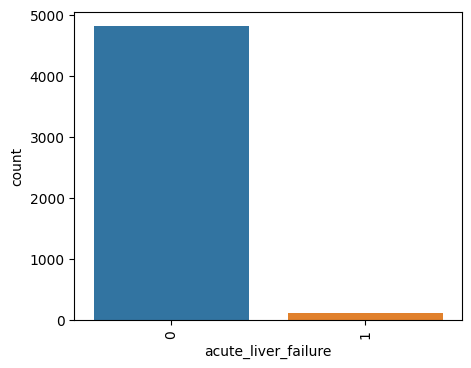

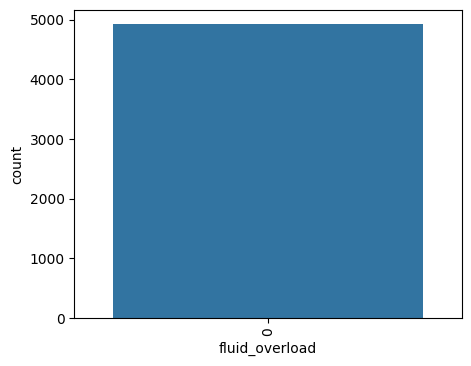

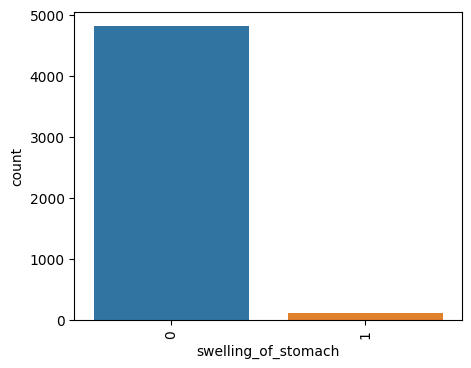

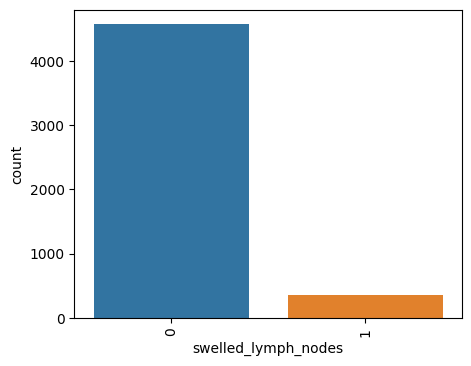

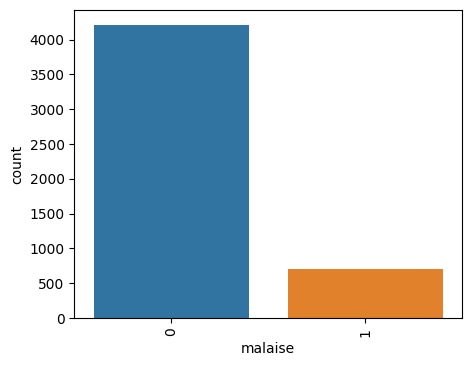

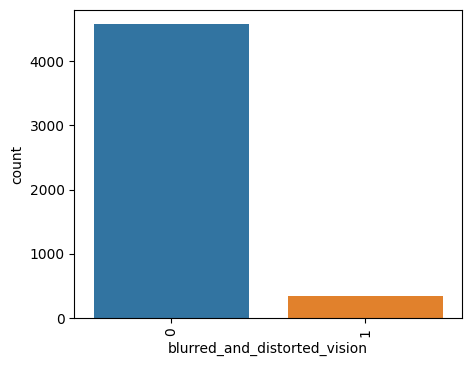

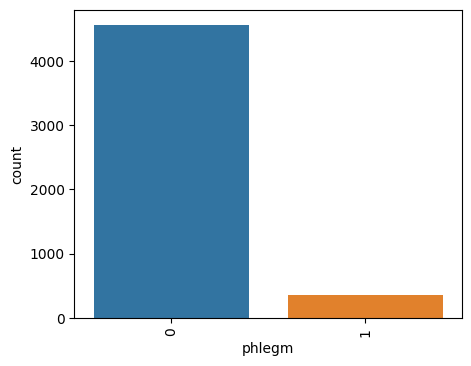

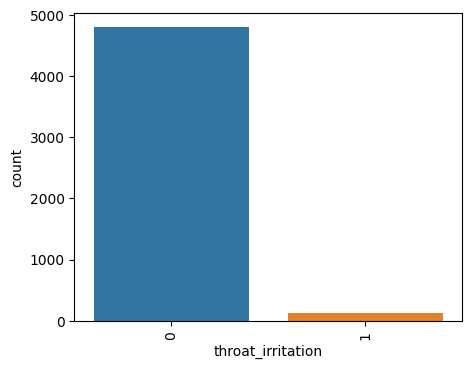

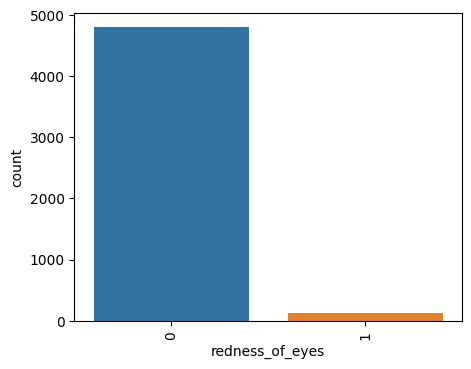

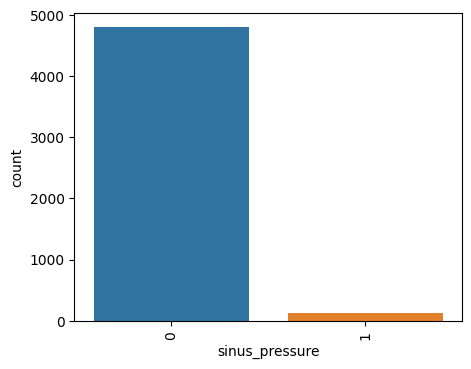

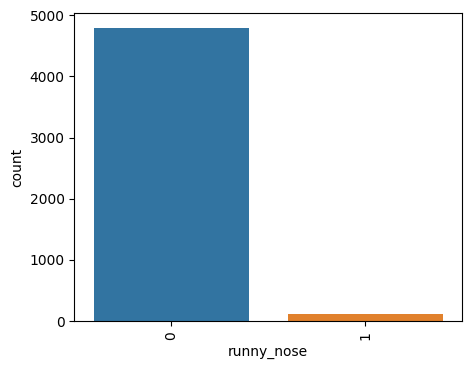

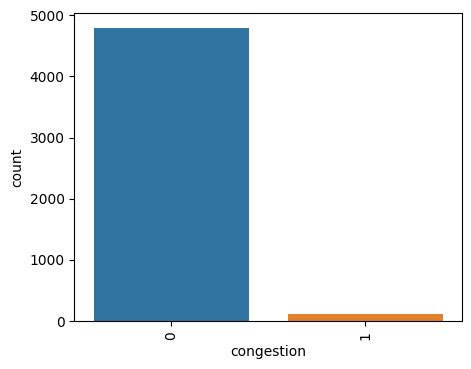

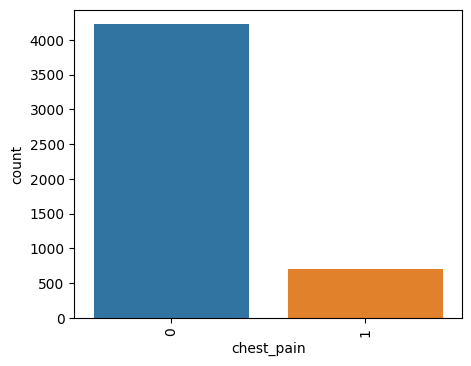

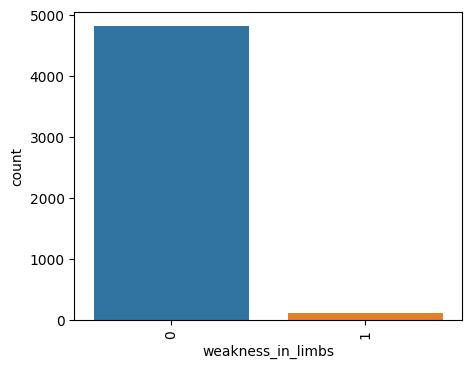

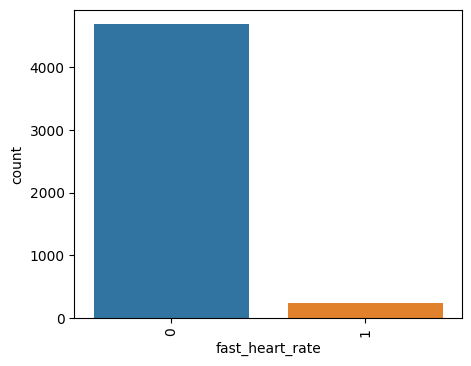

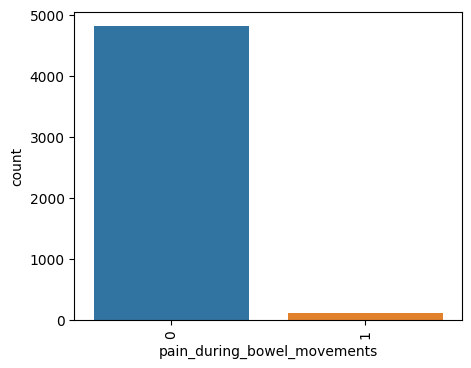

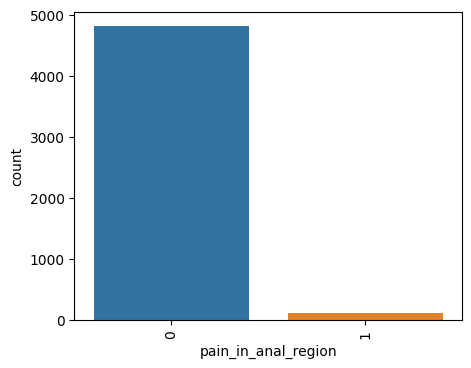

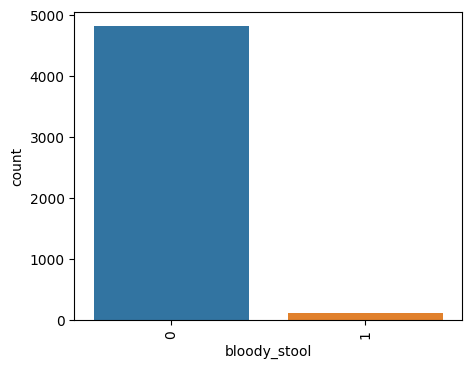

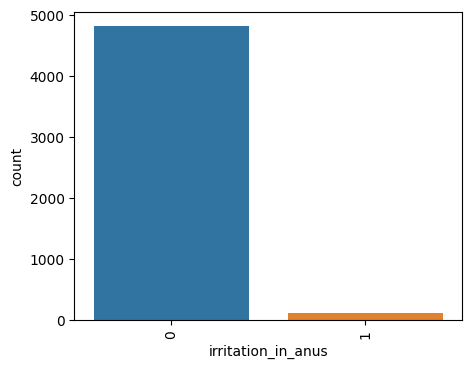

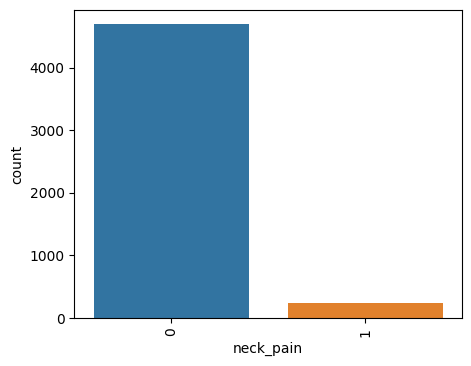

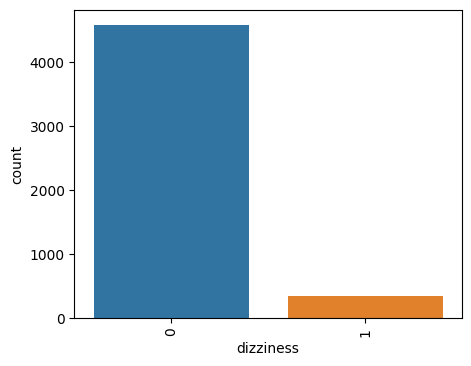

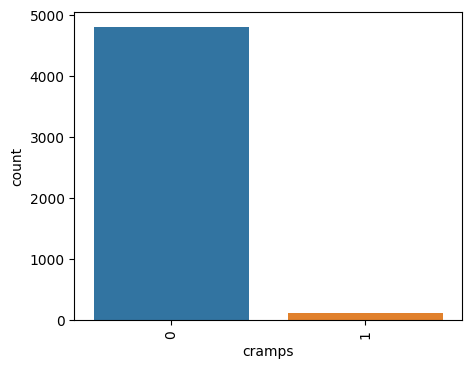

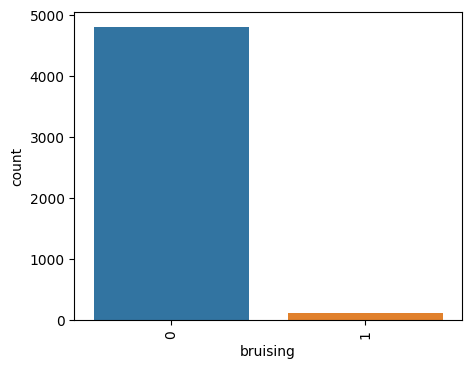

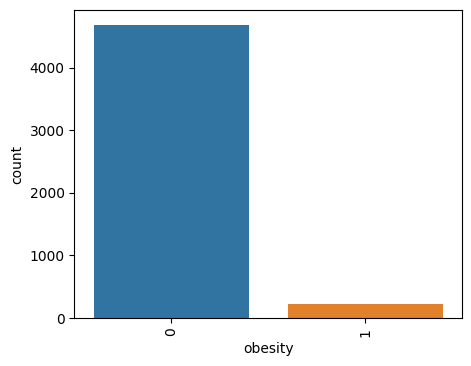

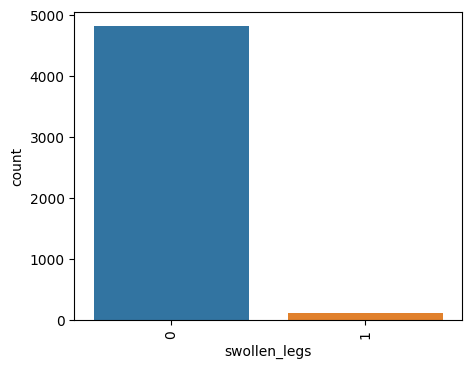

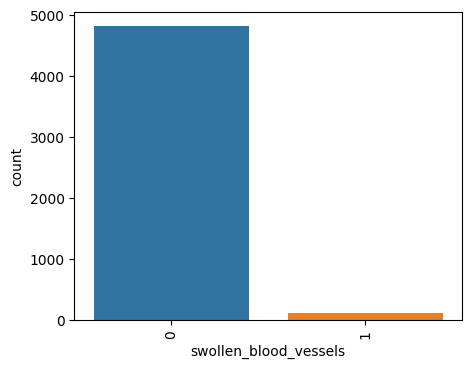

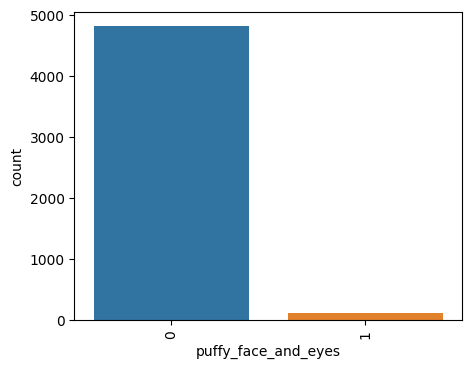

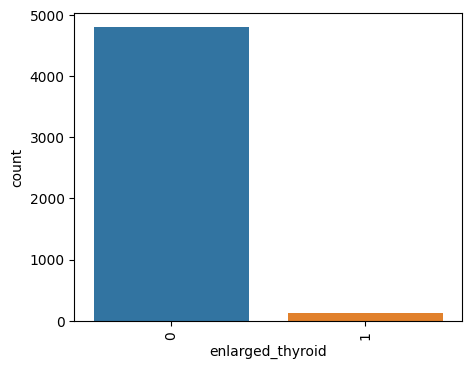

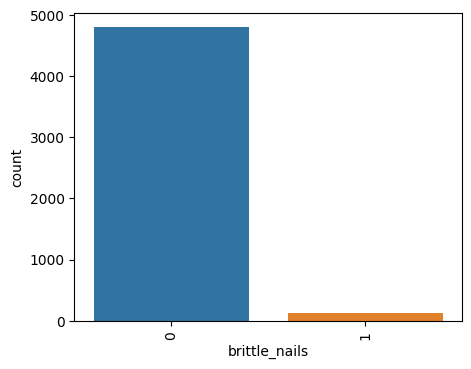

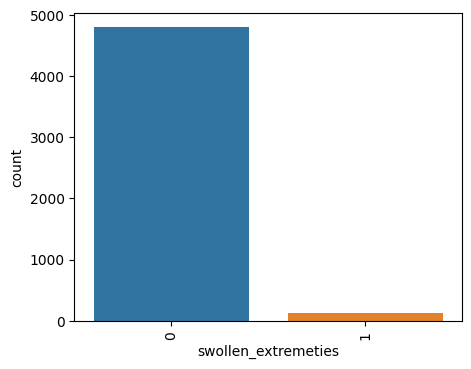

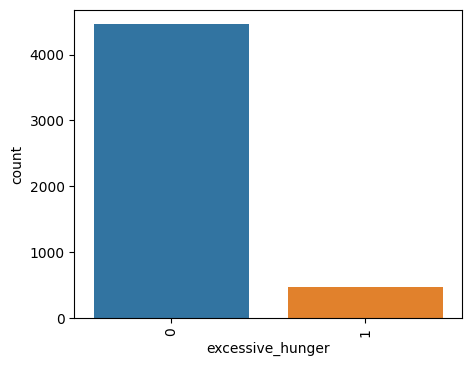

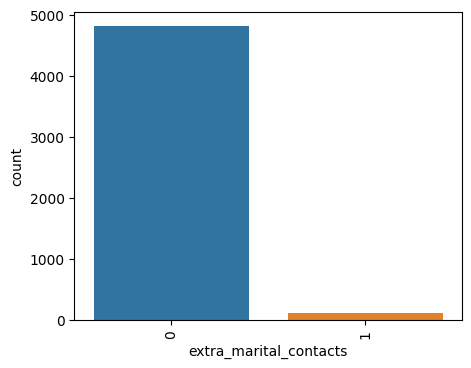

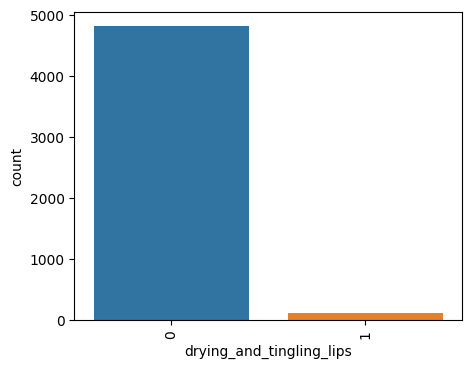

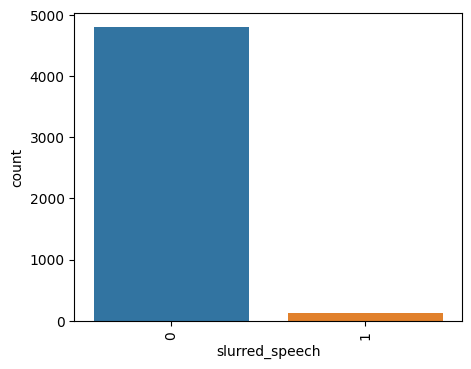

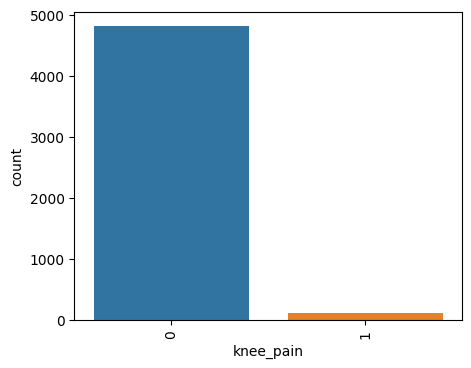

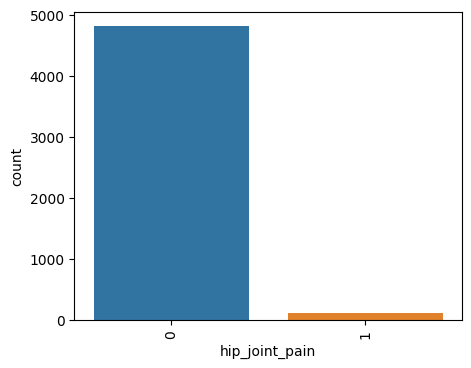

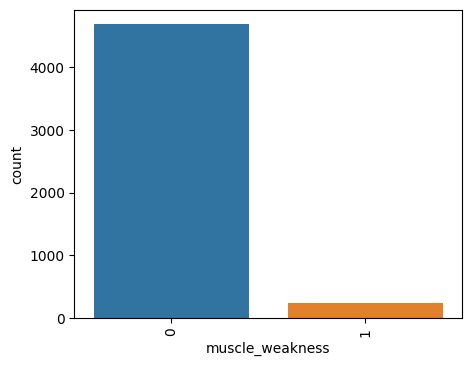

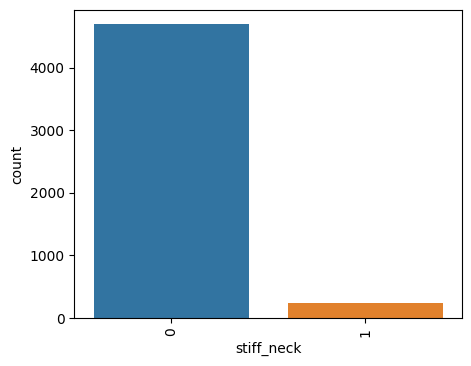

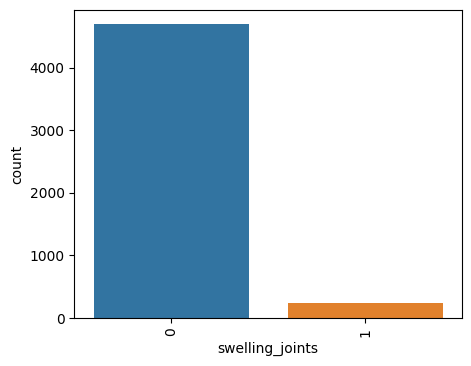

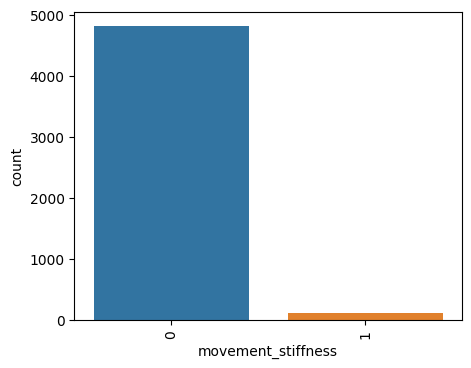

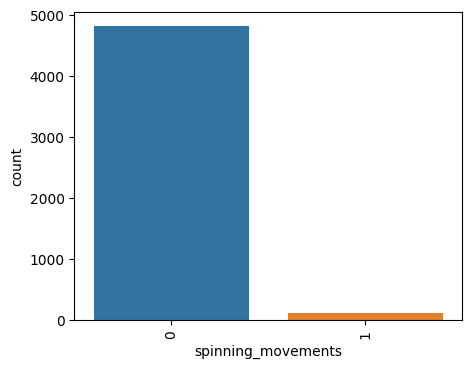

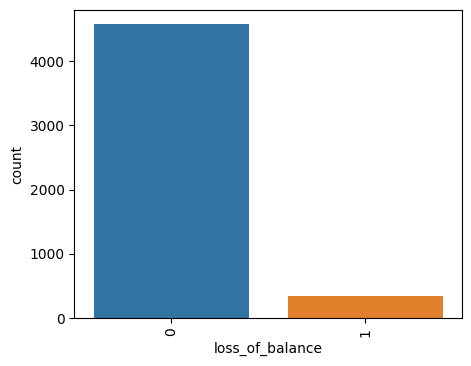

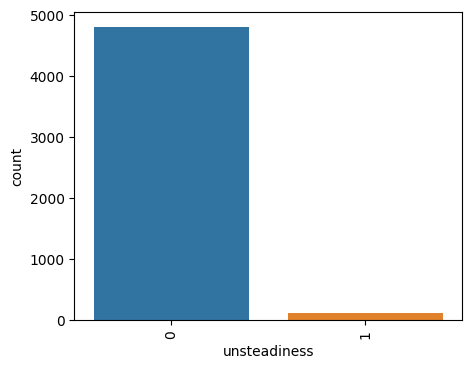

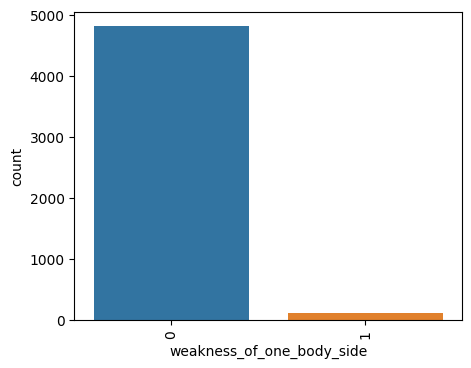

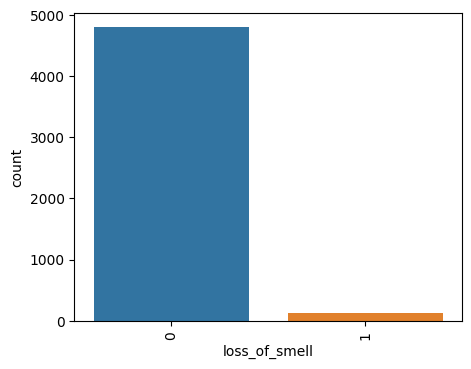

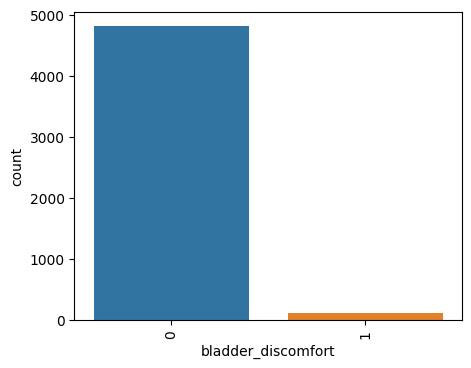

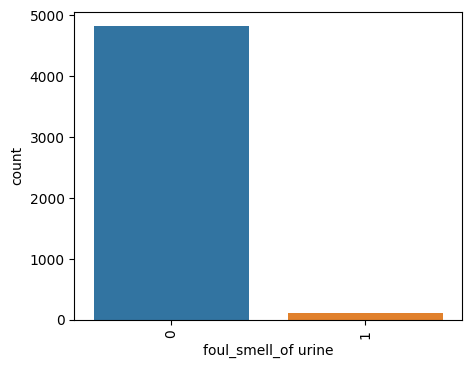

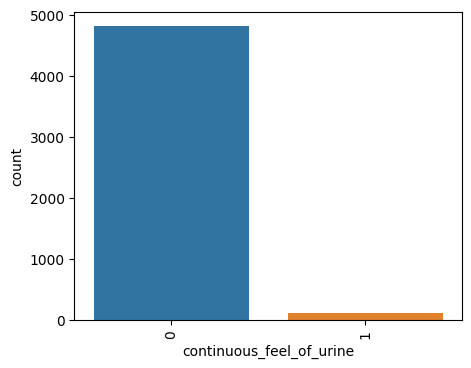

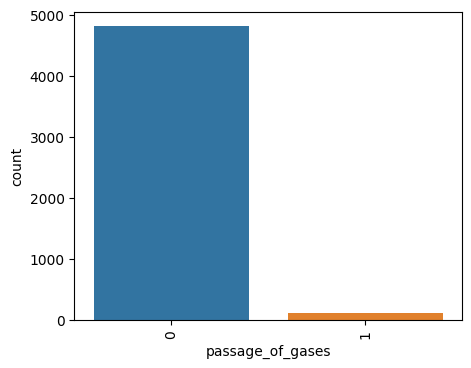

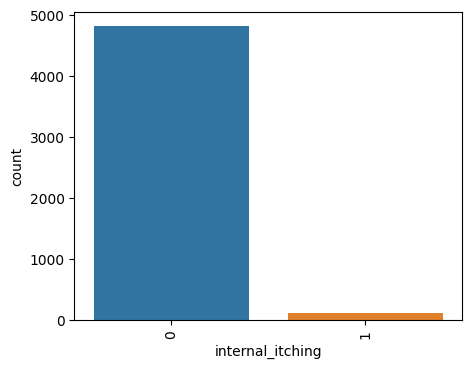

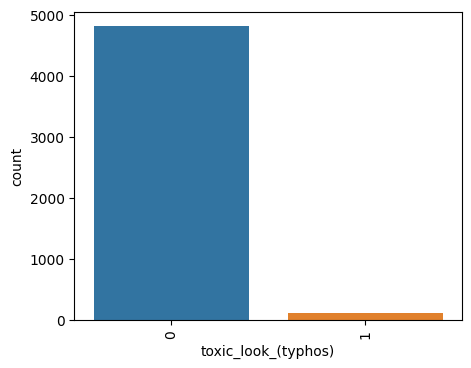

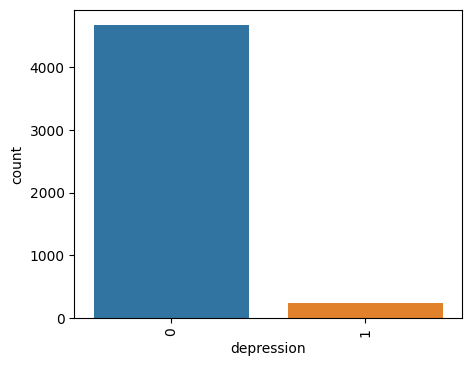

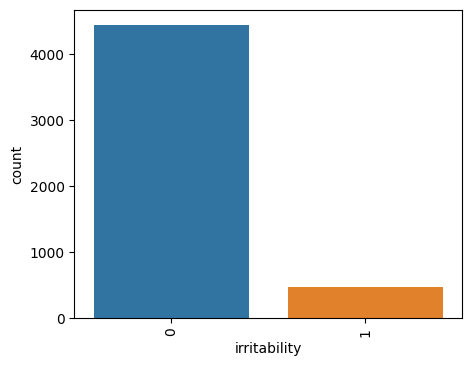

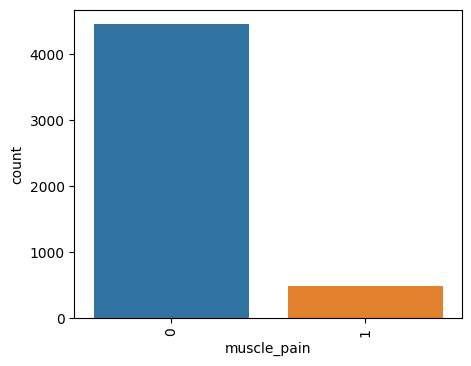

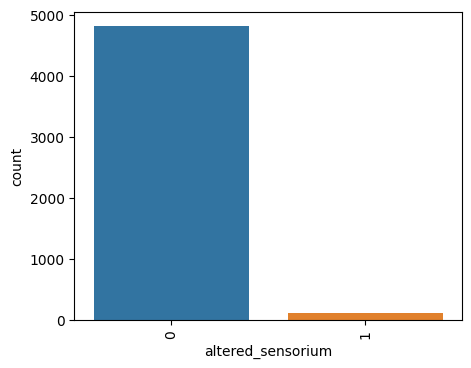

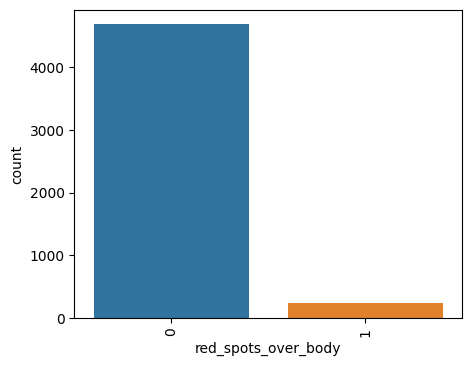

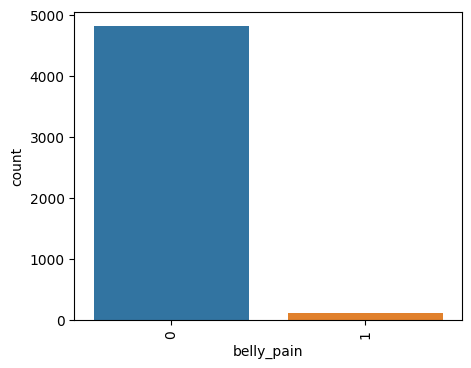

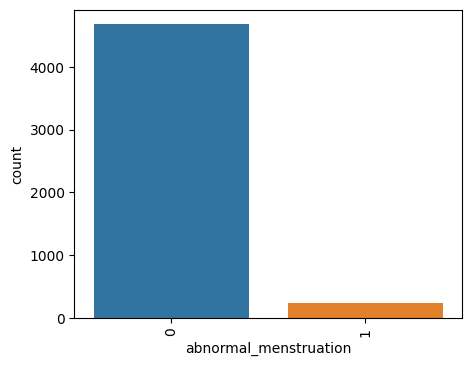

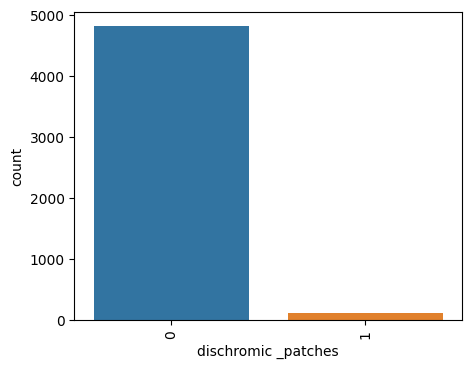

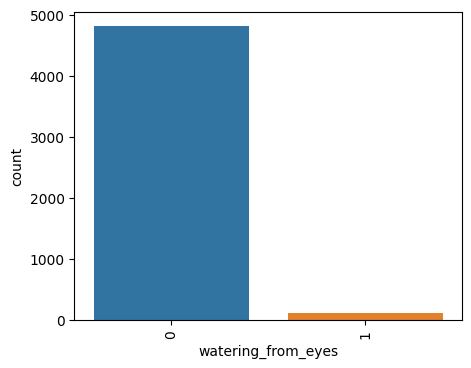

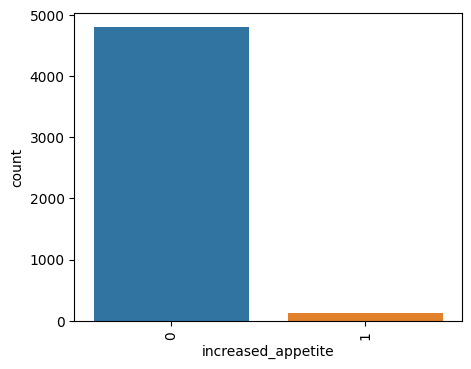

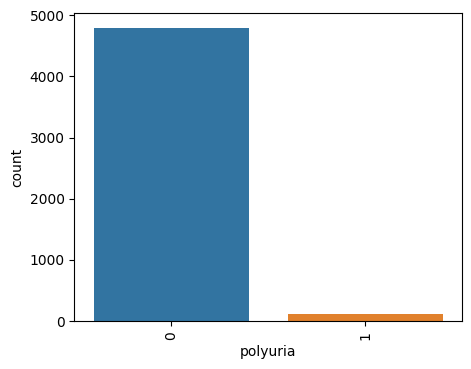

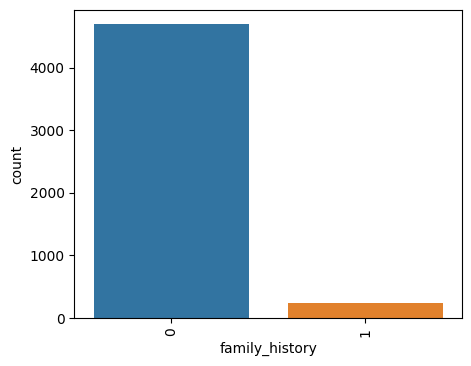

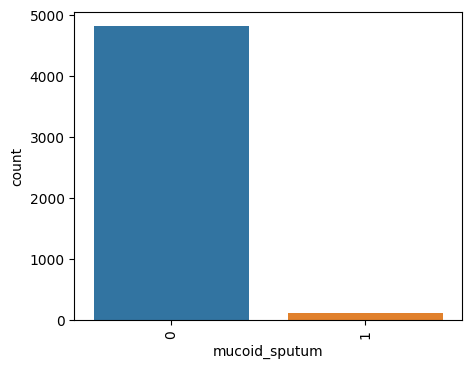

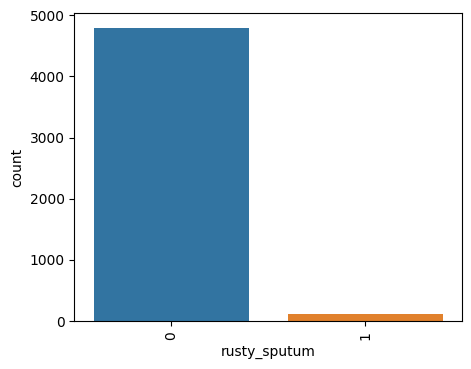

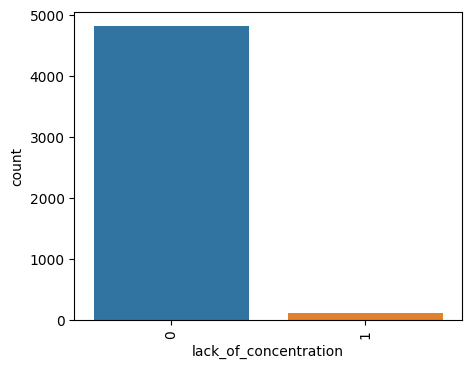

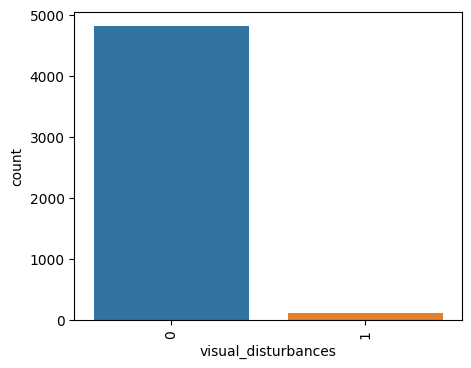

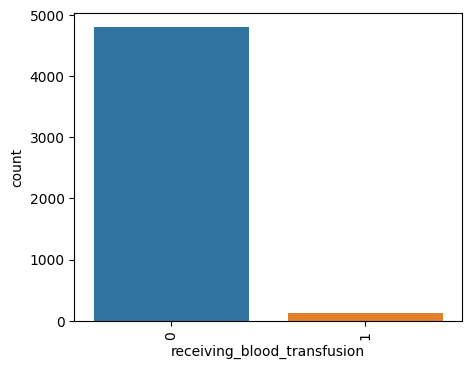

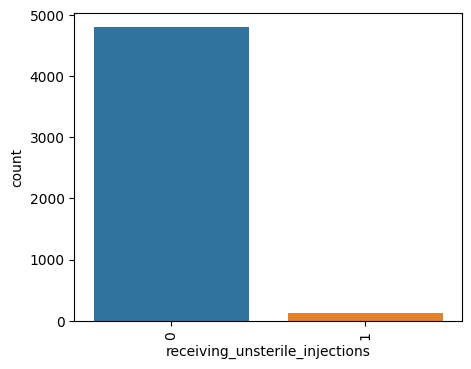

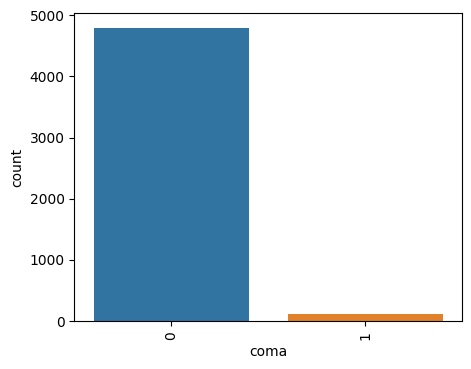

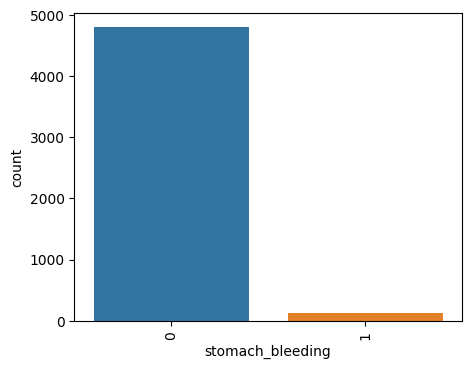

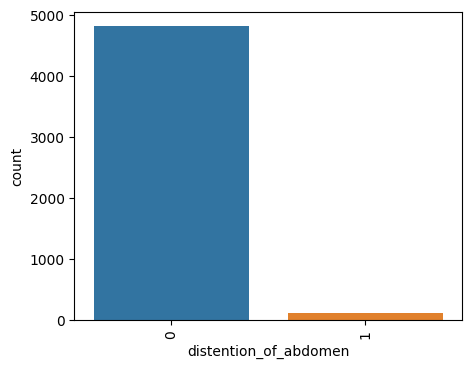

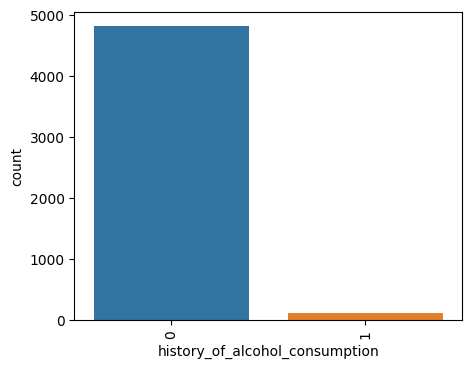

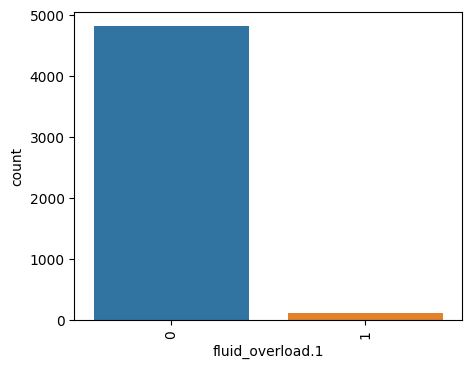

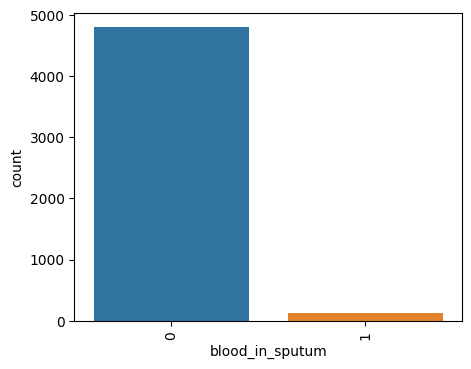

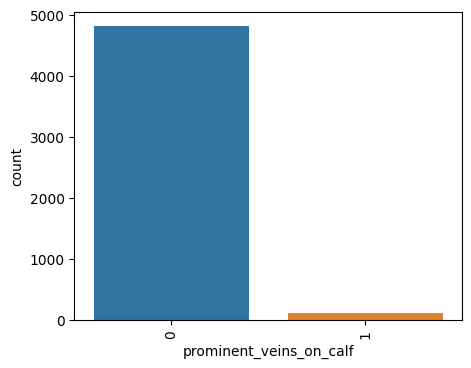

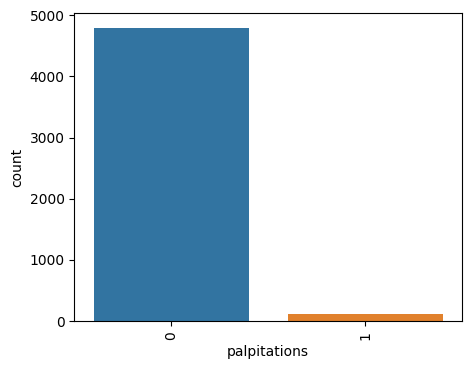

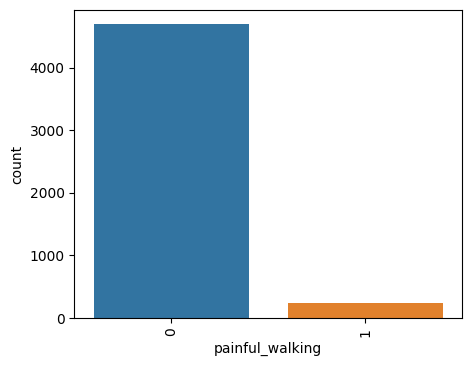

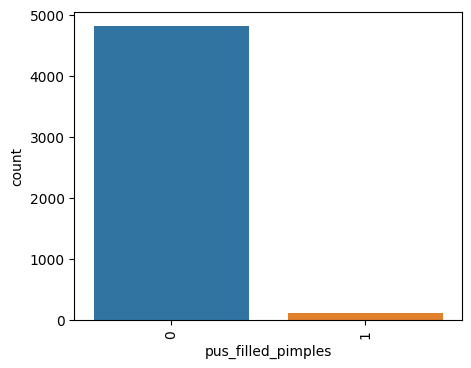

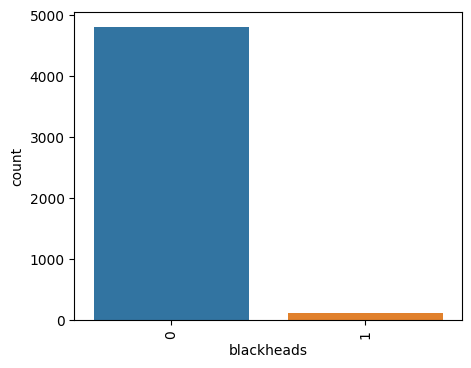

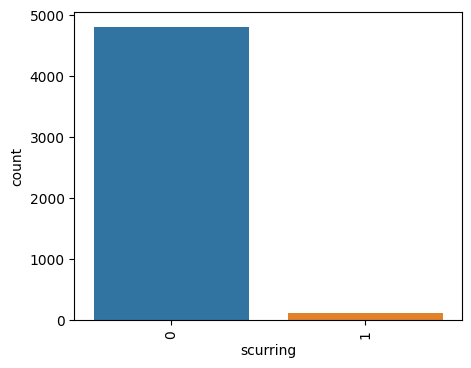

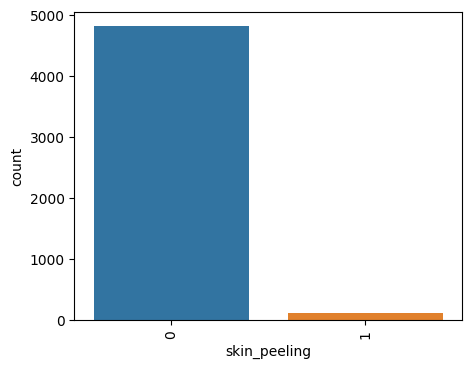

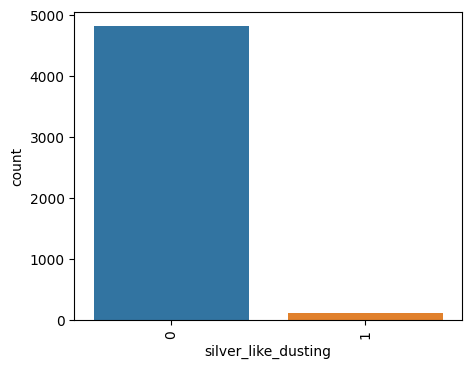

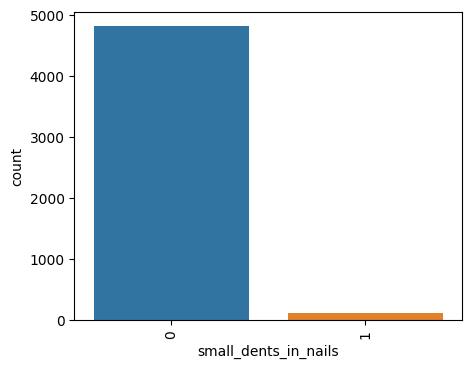

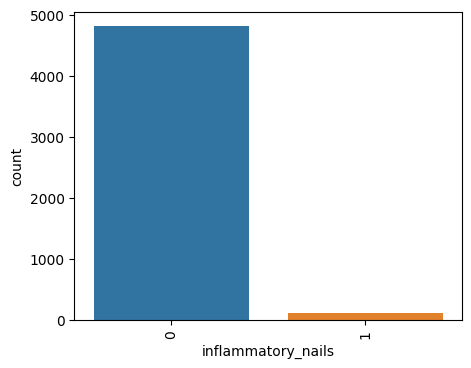

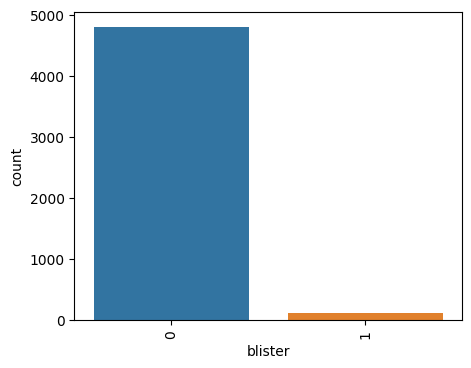

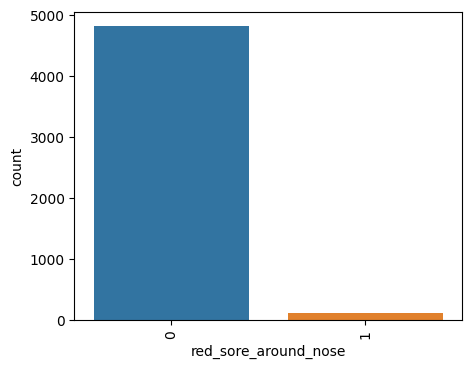

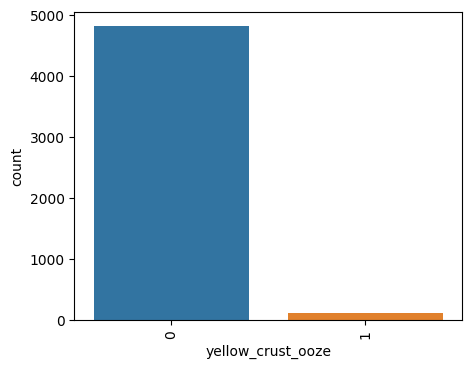

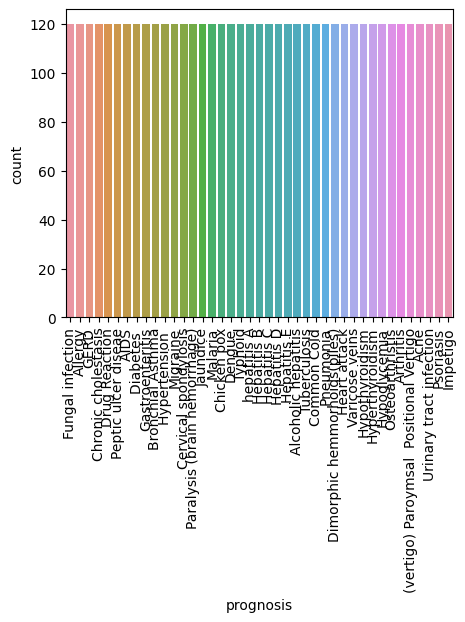

In [34]:
for column in df_train.columns:
    fig=plt.figure(figsize=(5,4))
    sns.countplot(data=df_train,x=column)
    plt.xticks(rotation=90)
    plt.xlabel(column)
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='itching', ylabel='Count'>

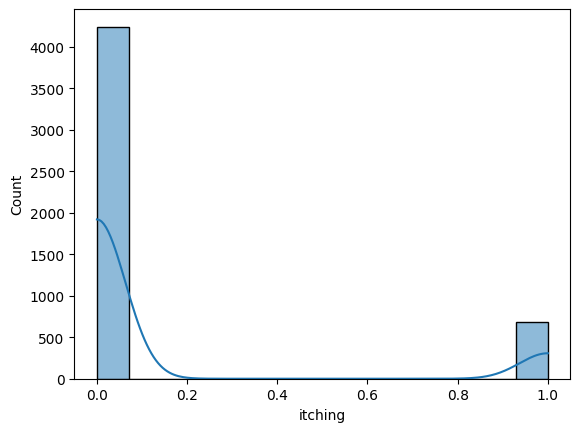

In [35]:
sns.histplot(x='itching',data = df_train,kde=True)

<Axes: xlabel='skin_rash', ylabel='itching'>

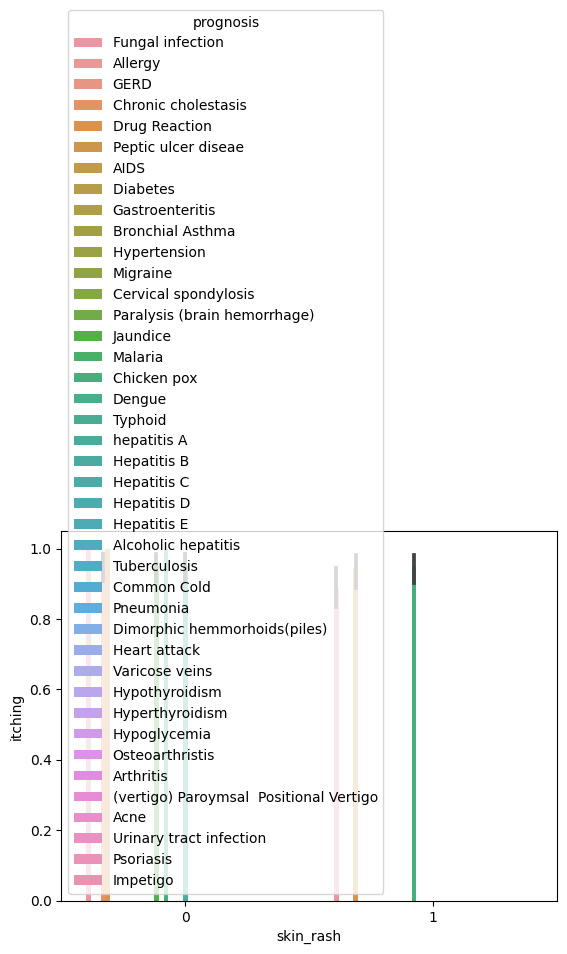

In [36]:
sns.barplot(x=df_train["skin_rash"] , y=df_train["itching"] , data=df_train,hue="prognosis")

<Axes: xlabel='small_dents_in_nails', ylabel='inflammatory_nails'>

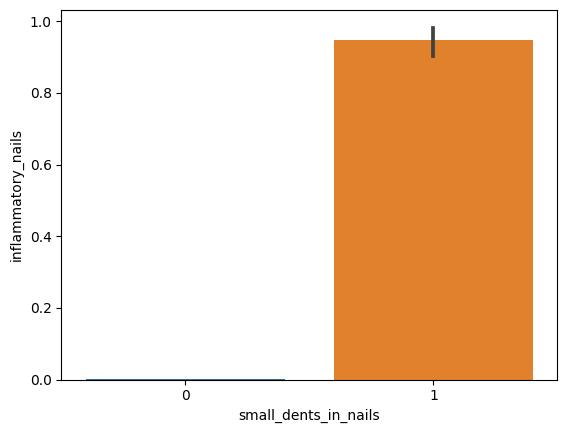

In [37]:
sns.barplot(x=df_train["small_dents_in_nails"] , y=df_train["inflammatory_nails"] , data=df_train)

<Axes: xlabel='red_sore_around_nose', ylabel='continuous_sneezing'>

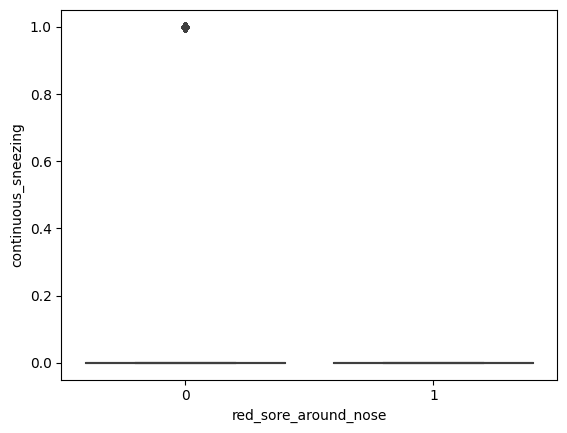

In [38]:
sns.boxplot(x=df_train["red_sore_around_nose"] , y=df_train["continuous_sneezing"] , data=df_train)

In [39]:
df_train.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [40]:
y=encoder.fit_transform(y)

In [41]:
Y =encoder.fit_transform(Y)

In [42]:
y

array([15, 15, 15, ..., 38, 35, 27])

In [43]:
Y

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27, 15])

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf=RandomForestClassifier(n_estimators=300 , random_state=42,max_depth=25)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=25, n_estimators=300, random_state=42)

In [48]:
y_pred=rf.predict(x_test)

In [49]:
y_pred

array([ 2,  2, 24,  1,  9, 23, 25,  5, 19, 30, 38, 12, 21, 35,  3,  3, 13,
       22, 12,  7,  6, 40, 19,  6,  4, 20, 34, 30, 26, 30,  9, 19, 17, 22,
       39, 30, 28, 14, 34, 38, 20,  0, 23, 12, 28, 17, 25, 19, 35, 35, 18,
       36, 39,  4, 24, 20, 37, 10, 38, 33, 25, 24, 36, 18,  0, 26, 32,  1,
        0, 13, 15,  6,  2, 22, 26,  9, 27, 27, 10, 30, 16, 27, 16, 14, 19,
        1, 28, 17,  0, 11, 26, 29, 21,  3, 36, 17, 29, 18, 34, 11, 23,  6,
        3,  4, 33, 39, 16, 30, 22,  1, 21, 39, 18, 25, 12, 14, 26, 28, 25,
        3,  7, 35, 32,  8,  5, 34, 17, 24, 35, 31, 11,  7,  7,  7,  9,  2,
       19, 34, 13, 37, 33, 18, 35, 19, 21, 31, 14, 39, 36,  3, 12, 31, 33,
       37, 23, 37, 25, 21,  3,  4,  6, 28,  1, 18, 40, 37, 29,  6, 27, 24,
       40, 21, 40, 17, 34, 27,  1, 40, 10,  8, 29,  1,  4, 40, 30, 37, 12,
       19, 11, 38, 37,  2, 39, 34, 22,  8, 15,  7, 19, 31, 17, 40, 39, 11,
       15,  0, 16,  4,  9,  8, 19, 31, 18, 13, 17, 28, 29, 18,  9, 21, 11,
        3,  3, 23, 32, 40

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
print(accuracy_score(y_test,y_pred))

1.0


In [52]:
#now cchecking the other dataset i.e test

In [53]:
Y

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27, 15])

In [54]:
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
test_prediction = rf.predict(X)

In [56]:
test_prediction

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27,  8])

In [57]:
print(accuracy_score(Y,test_prediction))

0.9761904761904762


In [58]:
type(Y)

numpy.ndarray

In [59]:
type(test_prediction)

numpy.ndarray

In [60]:
Y

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27, 15])

In [61]:
# Convert NumPy arrays to DataFrames with column names
Y_df = pd.DataFrame(Y, columns=["prognosis"])
test_pred_df = pd.DataFrame(test_prediction, columns=["predicted"])


In [62]:
result_df = Y_df.join(test_pred_df)

# Display the result DataFrame
print(result_df)

    prognosis  predicted
0          15         15
1           4          4
2          16         16
3           9          9
4          14         14
5          33         33
6           1          1
7          12         12
8          17         17
9           6          6
10         23         23
11         30         30
12          7          7
13         32         32
14         28         28
15         29         29
16          8          8
17         11         11
18         37         37
19         40         40
20         19         19
21         20         20
22         21         21
23         22         22
24          3          3
25         36         36
26         10         10
27         34         34
28         13         13
29         18         18
30         39         39
31         26         26
32         24         24
33         25         25
34         31         31
35          5          5
36          0          0
37          2          2
38         38         38


In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dtree = DecisionTreeClassifier()

In [65]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [66]:
dtree_pred=dtree.predict(x_test)

In [67]:
print(accuracy_score(y_test,dtree_pred))

1.0


In [68]:
dtree_pred.shape

(984,)

In [69]:
Y.shape

(42,)

In [70]:
dtree_pred_test= dtree.predict(X)

In [71]:
print(accuracy_score(Y,dtree_pred_test))

0.9761904761904762


**# Scale the features since SVM is sensitive to feature scaling**

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler=StandardScaler()

In [74]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)
scaled_x = scaler.transform(X)

In [75]:
from sklearn.svm import SVC

In [76]:
svm_clf = SVC(kernel ='linear', random_state = 52,C= 100)
svm_clf = svm_clf.fit(scaled_x_train,y_train)


In [77]:
svm_clf

SVC(C=100, kernel='linear', random_state=52)

In [78]:
pred_y=svm_clf.predict(scaled_x_test)

In [79]:
print(accuracy_score(y_test,pred_y))

1.0


In [80]:
pred_x_test = svm_clf.predict(scaled_x)

In [81]:
print(accuracy_score(Y,pred_x_test))

0.9761904761904762


# **Decision Tree:**
* A decision tree is a flowchart-like structure where each internal node represents a "test" on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label.
* Decision trees are intuitive and easy to interpret, making them useful for understanding the logic behind classification decisions.
* However, they can be prone to overfitting, especially with complex datasets.
# Bagging Classifier:
* Bagging (Bootstrap Aggregating) is an ensemble learning technique that combines multiple classifiers trained on different subsets of the training data.
* In a bagging classifier, multiple decision trees (or other base classifiers) are trained independently on random subsets of the training data with replacement.
* Bagging helps reduce variance and improve generalization by averaging the predictions of multiple models.
* Random Forest is a specific implementation of a bagging classifier using decision trees as the base classifiers.
# Support Vector Machine (SVM):
* SVM is a powerful supervised learning algorithm used for classification, regression, and outlier detection.
* SVM works by finding the optimal hyperplane that best separates the data points of different classes in a high-dimensional space.
* It is effective in high-dimensional spaces and is memory efficient since it only uses a subset of training points (support vectors) to define the decision boundary.
* SVM can handle non-linear decision boundaries using techniques like the kernel trick.\
# Random Forest:
* Random Forest is an ensemble learning method that combines multiple decision trees to create a more robust and accurate model.
* Unlike a single decision tree, which can overfit on the training data, Random Forest reduces overfitting by averaging the predictions of many trees trained on random subsets of the data.
* It introduces randomness both in the selection of data samples (bootstrap samples) and the features considered at each split, leading to diverse trees that collectively provide better generalization.
* Random Forest is known for its ability to handle high-dimensional data, large datasets, and maintain good performance without extensive hyperparameter tuning.


**In summary:**

* Decision trees are simple and interpretable but can overfit.
* Bagging classifiers like Random Forest reduce variance and overfitting by combining multiple decision trees.
* SVM finds optimal hyperplanes in high-dimensional spaces and is effective for various types of data.
* Random Forest is a specific type of bagging classifier using decision trees, known for its robustness and ability to handle complex datasets.

In [82]:
# Define hyperparameters for each model

In [83]:
models =[
    {'name':'RandomForest','model':RandomForestClassifier(),'params':{'n_estimators':[10,50,100],'max_depth':[5,10,None]}},
    {'name':'DecisionTree','model':DecisionTreeClassifier(),'params':{'max_depth':[5,10,None], 'min_sample_split':[2,5]}},
    {'name':'svm','model':SVC(),'params':{'kernel':['linear','rbf']}}
]


**We can merge all model and get the accuracy through below method**

In [84]:
# for mod in models:
#     model_name = mod['name']
#     model = mod['model']
#     params = mod['params']
    
#     print(f"Training {model_name}...")
    
#     best_accuracy=0
#     best_params =None
    
#     # Hyperparameter tuning with grid search (replace with your preferred tuning method)
    
#     for param_combination in Parameter_Grid(params):
#         model.set_params(**param_combination)
#         model.fit(X_train,y_train)
#         y_pred = model.predict(X_test)
#         accuracy = accuracy_score(y_test, y_pred)
    
#         if accuracy > best_accuracy:
#             best_accuracy = accuracy
#             best_params = param_combination

#         print(f"Best parameters for {model_name}: {best_params}")
#         print(f"Accuracy on test set for {model_name}: {best_accuracy}\n")